In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import joblib # Note: require sklearn v0.22+ (to update sklearn: pip install -U scikit-learn ). For old version sklearn: from sklearn.externals import joblib 
from sklearn.linear_model import SGDClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
import random

In [3]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 1.2. Reshape to 2D array: each row has 784 (28X28 pixel) features
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [4]:
y_train_2 = (y_train == 2) 
y_test_2 = (y_test == 2)

In [5]:
randomForest = False
rfc = RandomForestClassifier(n_estimators=70, oob_score=True, random_state=101)
if randomForest:
  rfc.fit(X_train, y_train)
  joblib.dump(rfc,'saved_var/rfc_binary')
else:
  rfc = joblib.load('saved_var/rfc_binary')


In [19]:
# Try prediction
sample_id = 15
print(rfc.predict([X_train[sample_id]]))
print(y_train[sample_id])
# To see scores from classifers
print(rfc.classes_)
sample_scores = rfc.predict_proba([X_train[sample_id]]) 
print(sample_scores)
class_with_max_score = np.argmax(sample_scores)

[9]
9
[0 1 2 3 4 5 6 7 8 9]
[[0.         0.         0.         0.         0.         0.
  0.         0.02857143 0.         0.97142857]]


In [21]:
count = 0
for i in range(1000):
    sample_id = random.randint(1, 60000)
    predict = rfc.predict([X_train[sample_id]])
    label = y_train[sample_id]
    if predict == label:
        count += 1
print(count)
  

1000


In [25]:
from sklearn.multiclass import OneVsRestClassifier
new_run = False
sample_id = 15
ova_clf = OneVsRestClassifier(RandomForestClassifier(random_state=101, n_estimators=70))
if new_run == True:
    ova_clf.fit(X_train, y_train)
    joblib.dump(ova_clf,'saved_var/ova_random_clf')
else:
    ova_clf = joblib.load('saved_var/ova_random_clf')
print(len(ova_clf.estimators_))
sample_scores = ova_clf.predict_proba([X_train[sample_id]]) 
print(sample_scores)

10
[[0.         0.         0.         0.         0.         0.
  0.         0.01428571 0.         0.98571429]]


In [29]:
from sklearn.multiclass import OneVsOneClassifier
new_run = False
ovo_clf = OneVsOneClassifier(RandomForestClassifier(random_state=101, n_estimators=70))
if new_run == True:
    ovo_clf.fit(X_train, y_train)
    joblib.dump(ovo_clf,'saved_var/ovo_random_clf')
else:
    ovo_clf = joblib.load('saved_var/ovo_random_clf')
print(len(ovo_clf.estimators_))
sample_scores = ovo_clf.decision_function([X_train[sample_id]]) 
print(sample_scores)

45
[[ 3.71370968 -0.29151732  1.7287234   0.74097665  2.76767677  7.25476992
   5.06818182  8.28379335  6.27764519  9.3       ]]


In [30]:
# 6.2. RandomForestClassifier  
# Warning: takes time for new run! 
new_run = False
if new_run == True:
    forest_acc = cross_val_score(rfc, X_train, y_train, cv=3, scoring="accuracy")
    joblib.dump(forest_acc,'saved_var/forest_acc_multi')
else:
    forest_acc = joblib.load('saved_var/forest_acc_multi')
print(forest_acc)

[0.87455 0.8801  0.87755]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [32]:
new_run = False
if new_run == True:
    forest_acc_after_scaling = cross_val_score(rfc, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=4)
    joblib.dump(forest_acc_after_scaling,'saved_var/forest_acc_after_scaling')
else:
    forest_acc_after_scaling = joblib.load('saved_var/forest_acc_after_scaling')
print(forest_acc_after_scaling)


[0.8746  0.88005 0.8778 ]


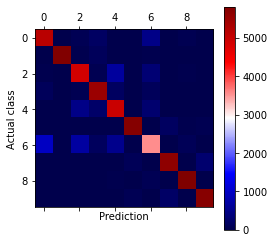

In [34]:
new_run = True
if new_run == True:
    y_train_pred = cross_val_predict(rfc, X_train_scaled, y_train, cv=3)
    joblib.dump(y_train_pred,'saved_var/y_train_pred_random')
else:
    y_train_pred = joblib.load('saved_var/y_train_pred_random')
conf_mat = confusion_matrix(y_train, y_train_pred) # row: actual class, col: prediction
let_plot = True;
if let_plot:
    plt.matshow(conf_mat, cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.savefig("figs/confusionRandom_matrix_plot")
    plt.show()

In [35]:
conf_mat

array([[5148,    2,   88,  198,   20,    4,  490,    0,   50,    0],
       [  10, 5783,   23,  135,    6,    1,   40,    0,    2,    0],
       [  34,    2, 4865,   62,  666,    1,  332,    0,   38,    0],
       [ 133,   21,   50, 5483,  174,    0,  126,    0,   13,    0],
       [  12,    7,  477,  228, 4969,    1,  285,    0,   20,    1],
       [   0,    0,    1,    1,    0, 5727,    1,  178,   27,   65],
       [ 958,    3,  703,  149,  543,    4, 3544,    0,   96,    0],
       [   0,    0,    0,    0,    0,  105,    0, 5610,   11,  274],
       [   9,    2,   22,   20,   29,   19,   71,   11, 5813,    4],
       [   0,    0,    0,    1,    1,   70,    5,  208,    8, 5707]],
      dtype=int64)

C:\Users\hp\AppData\Local\Temp\ipykernel_36212\1710595249.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("figs/confusionRandom_matrix_errors_plot", tight_layout=False)


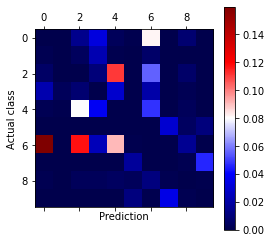

In [36]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
# Replace rates on diagonal (correct classifitions) by zeros    
if let_plot:
    np.fill_diagonal(norm_conf_mat, 0)
    plt.matshow(norm_conf_mat,cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.savefig("figs/confusionRandom_matrix_errors_plot", tight_layout=False)
    plt.show()

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")